In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import time

# Настройка отображения
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
print("="*70)
print("ЗАГРУЗКА ДАННЫХ")
print("="*70)

start_time = time.time()

# Загрузка обучающей и тестовой выборок
train_data = load_files('20news/20news-bydate-train', encoding='latin1')
test_data = load_files('20news/20news-bydate-test', encoding='latin1')

load_time = time.time() - start_time

print(f"\n✓ Данные загружены за {load_time:.2f} сек")
print(f"\nИнформация о датасете:")
print(f"  - Обучающая выборка: {len(train_data.data)} документов")
print(f"  - Тестовая выборка: {len(test_data.data)} документов")
print(f"  - Количество классов: {len(train_data.target_names)}")
print(f"\nКлассы (рубрики новостей):")
for i, name in enumerate(train_data.target_names, 1):
    print(f"  {i:2d}. {name}")


ЗАГРУЗКА ДАННЫХ

✓ Данные загружены за 1.97 сек

Информация о датасете:
  - Обучающая выборка: 11314 документов
  - Тестовая выборка: 7532 документов
  - Количество классов: 20

Классы (рубрики новостей):
   1. alt.atheism
   2. comp.graphics
   3. comp.os.ms-windows.misc
   4. comp.sys.ibm.pc.hardware
   5. comp.sys.mac.hardware
   6. comp.windows.x
   7. misc.forsale
   8. rec.autos
   9. rec.motorcycles
  10. rec.sport.baseball
  11. rec.sport.hockey
  12. sci.crypt
  13. sci.electronics
  14. sci.med
  15. sci.space
  16. soc.religion.christian
  17. talk.politics.guns
  18. talk.politics.mideast
  19. talk.politics.misc
  20. talk.religion.misc


In [3]:
print("\n" + "="*70)
print("ВЕКТОРИЗАЦИЯ ТЕКСТОВ")
print("="*70)

start_time = time.time()

# Создание векторизатора и преобразование текстов
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

vec_time = time.time() - start_time

print(f"\n✓ Векторизация завершена за {vec_time:.2f} сек")
print(f"\nХарактеристики матрицы признаков:")
print(f"  - Обучающая выборка: {X_train.shape[0]} документов × {X_train.shape[1]} признаков")
print(f"  - Тестовая выборка: {X_test.shape[0]} документов × {X_test.shape[1]} признаков")
print(f"  - Размер словаря: {len(vectorizer.vocabulary_)} уникальных слов")
print(f"  - Разреженность матрицы: {(1 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.2f}%")



ВЕКТОРИЗАЦИЯ ТЕКСТОВ

✓ Векторизация завершена за 3.97 сек

Характеристики матрицы признаков:
  - Обучающая выборка: 11314 документов × 130107 признаков
  - Тестовая выборка: 7532 документов × 130107 признаков
  - Размер словаря: 130107 уникальных слов
  - Разреженность матрицы: 99.88%


In [4]:
print("\n" + "="*70)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ КЛАССОВ")
print("="*70)

# Подсчет количества документов в каждом классе
unique, counts = np.unique(train_data.target, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("\nРаспределение классов в обучающей выборке:")
print("-"*70)

for class_id, count in class_distribution.items():
    class_name = train_data.target_names[class_id]
    percentage = (count / len(train_data.target)) * 100
    bar = '█' * int(percentage)
    print(f"{class_id:2d}. {class_name:30s}: {count:4d} ({percentage:5.2f}%) {bar}")

# Проверка на сбалансированность
max_count = max(counts)
min_count = min(counts)
imbalance_ratio = max_count / min_count

print(f"\nСтатистика распределения:")
print(f"  - Максимум документов в классе: {max_count}")
print(f"  - Минимум документов в классе: {min_count}")
print(f"  - Коэффициент дисбаланса: {imbalance_ratio:.2f}")

if imbalance_ratio > 2:
    print("  ⚠ Датасет несбалансирован")
else:
    print("  ✓ Датасет сбалансирован")



АНАЛИЗ РАСПРЕДЕЛЕНИЯ КЛАССОВ

Распределение классов в обучающей выборке:
----------------------------------------------------------------------
 0. alt.atheism                   :  480 ( 4.24%) ████
 1. comp.graphics                 :  584 ( 5.16%) █████
 2. comp.os.ms-windows.misc       :  591 ( 5.22%) █████
 3. comp.sys.ibm.pc.hardware      :  590 ( 5.21%) █████
 4. comp.sys.mac.hardware         :  578 ( 5.11%) █████
 5. comp.windows.x                :  593 ( 5.24%) █████
 6. misc.forsale                  :  585 ( 5.17%) █████
 7. rec.autos                     :  594 ( 5.25%) █████
 8. rec.motorcycles               :  598 ( 5.29%) █████
 9. rec.sport.baseball            :  597 ( 5.28%) █████
10. rec.sport.hockey              :  600 ( 5.30%) █████
11. sci.crypt                     :  595 ( 5.26%) █████
12. sci.electronics               :  591 ( 5.22%) █████
13. sci.med                       :  594 ( 5.25%) █████
14. sci.space                     :  593 ( 5.24%) █████
15. soc.religion

## Задание 1


ЗАДАНИЕ 1: ПОДБОР ОПТИМАЛЬНОГО ЗНАЧЕНИЯ ПАРАМЕТРА ALPHA

Запуск 100 экспериментов...

[  1/100] alpha=0.0100, accuracy=0.8039 | Прогресс:   1.0% | Осталось: ~23 сек
[ 10/100] alpha=0.1000, accuracy=0.8062 | Прогресс:  10.0% | Осталось: ~16 сек
[ 20/100] alpha=0.2000, accuracy=0.8038 | Прогресс:  20.0% | Осталось: ~13 сек
[ 30/100] alpha=0.3000, accuracy=0.8027 | Прогресс:  30.0% | Осталось: ~11 сек
[ 40/100] alpha=0.4000, accuracy=0.8011 | Прогресс:  40.0% | Осталось: ~10 сек
[ 50/100] alpha=0.5000, accuracy=0.7970 | Прогресс:  50.0% | Осталось: ~8 сек
[ 60/100] alpha=0.6000, accuracy=0.7947 | Прогресс:  60.0% | Осталось: ~7 сек
[ 70/100] alpha=0.7000, accuracy=0.7901 | Прогресс:  70.0% | Осталось: ~5 сек
[ 80/100] alpha=0.8000, accuracy=0.7851 | Прогресс:  80.0% | Осталось: ~3 сек
[ 90/100] alpha=0.9000, accuracy=0.7784 | Прогресс:  90.0% | Осталось: ~2 сек
[100/100] alpha=1.0000, accuracy=0.7728 | Прогресс: 100.0% | Осталось: ~0 сек

РЕЗУЛЬТАТЫ:
Оптимальное alpha: 0.1100
Максимальна

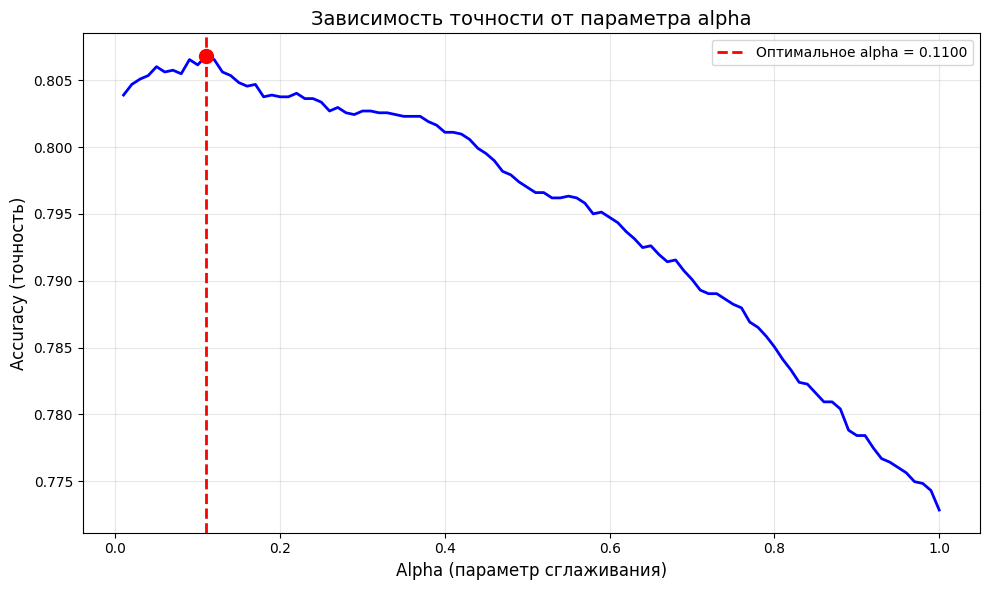

✓ Результаты сохранены


In [5]:
print("\n" + "="*70)
print("ЗАДАНИЕ 1: ПОДБОР ОПТИМАЛЬНОГО ЗНАЧЕНИЯ ПАРАМЕТРА ALPHA")
print("="*70)

# Диапазон значений alpha
alphas = np.linspace(0.01, 1.0, 100)
accuracies = []

start_time = time.time()
total_experiments = len(alphas)

print(f"\nЗапуск {total_experiments} экспериментов...\n")

for i, alpha in enumerate(alphas, 1):
    # Обучение и оценка
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, train_data.target)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(test_data.target, y_pred)
    accuracies.append(accuracy)
    
    # Вывод прогресса
    if i % 10 == 0 or i == 1:
        elapsed = time.time() - start_time
        avg_time = elapsed / i
        remaining = avg_time * (total_experiments - i)
        progress = (i / total_experiments) * 100
        
        print(f"[{i:3d}/100] alpha={alpha:.4f}, accuracy={accuracy:.4f} | "
              f"Прогресс: {progress:5.1f}% | Осталось: ~{remaining:.0f} сек")

# Анализ результатов
accuracies = np.array(accuracies)
optimal_idx = np.argmax(accuracies)
optimal_alpha = alphas[optimal_idx]
optimal_accuracy = accuracies[optimal_idx]

print(f"\n{'='*70}")
print("РЕЗУЛЬТАТЫ:")
print(f"{'='*70}")
print(f"Оптимальное alpha: {optimal_alpha:.4f}")
print(f"Максимальная точность: {optimal_accuracy:.4f} ({optimal_accuracy*100:.2f}%)")
print(f"Средняя точность: {accuracies.mean():.4f} ({accuracies.mean()*100:.2f}%)")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, 'b-', linewidth=2)
plt.axvline(x=optimal_alpha, color='r', linestyle='--', linewidth=2,
            label=f'Оптимальное alpha = {optimal_alpha:.4f}')
plt.scatter([optimal_alpha], [optimal_accuracy], color='r', s=100, zorder=5)
plt.xlabel('Alpha (параметр сглаживания)', fontsize=12)
plt.ylabel('Accuracy (точность)', fontsize=12)
plt.title('Зависимость точности от параметра alpha', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('alpha_optimization.png', dpi=300)
plt.show()

# Сохранение
results_df = pd.DataFrame({'alpha': alphas, 'accuracy': accuracies})
results_df.to_csv('alpha_results.csv', index=False)
print("✓ Результаты сохранены")


## Задание 2


ЗАДАНИЕ 2: СРАВНЕНИЕ АПРИОРНЫХ ВЕРОЯТНОСТЕЙ

Эксперимент 1: Равные априорные вероятности
✓ Точность: 0.8066 (80.66%)

Эксперимент 2: Эмпирические априорные вероятности
✓ Точность: 0.8068 (80.68%)

Разница в точности: +0.0003 (+0.03%)
→ Оба метода показывают практически одинаковую точность


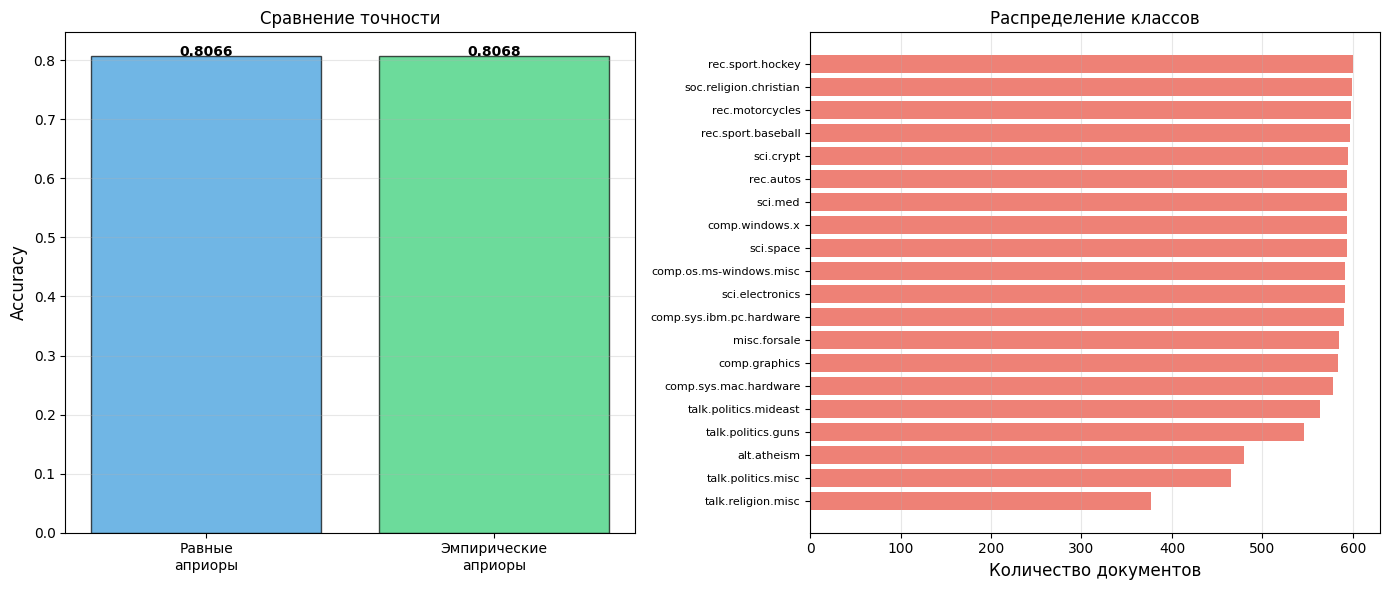

✓ Результаты сохранены


In [6]:
print("\n" + "="*70)
print("ЗАДАНИЕ 2: СРАВНЕНИЕ АПРИОРНЫХ ВЕРОЯТНОСТЕЙ")
print("="*70)

# Используем найденное оптимальное значение alpha
# optimal_alpha уже определен в задании 1

# Эксперимент 1: Равные априоры
print("\nЭксперимент 1: Равные априорные вероятности")
clf_uniform = MultinomialNB(alpha=optimal_alpha, fit_prior=False)
clf_uniform.fit(X_train, train_data.target)
y_pred_uniform = clf_uniform.predict(X_test)
accuracy_uniform = accuracy_score(test_data.target, y_pred_uniform)
print(f"✓ Точность: {accuracy_uniform:.4f} ({accuracy_uniform*100:.2f}%)")

# Эксперимент 2: Эмпирические априоры
print("\nЭксперимент 2: Эмпирические априорные вероятности")
clf_empirical = MultinomialNB(alpha=optimal_alpha, fit_prior=True)
clf_empirical.fit(X_train, train_data.target)
y_pred_empirical = clf_empirical.predict(X_test)
accuracy_empirical = accuracy_score(test_data.target, y_pred_empirical)
print(f"✓ Точность: {accuracy_empirical:.4f} ({accuracy_empirical*100:.2f}%)")

# Сравнение
diff = accuracy_empirical - accuracy_uniform
print(f"\n{'='*70}")
print(f"Разница в точности: {diff:+.4f} ({diff*100:+.2f}%)")
if abs(diff) < 0.001:
    print("→ Оба метода показывают практически одинаковую точность")
elif diff > 0:
    print("→ Эмпирические априоры дают лучший результат")
else:
    print("→ Равные априоры дают лучший результат")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Сравнение точности
methods = ['Равные\nаприоры', 'Эмпирические\nаприоры']
accuracies_comp = [accuracy_uniform, accuracy_empirical]
colors = ['#3498db', '#2ecc71']

axes[0].bar(methods, accuracies_comp, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Сравнение точности', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')
for i, acc in enumerate(accuracies_comp):
    axes[0].text(i, acc + 0.001, f'{acc:.4f}', ha='center', fontweight='bold')

# График 2: Распределение классов
class_counts_sorted = sorted(class_distribution.items(), key=lambda x: x[1], reverse=True)
class_names_sorted = [train_data.target_names[i] for i, _ in class_counts_sorted]
counts_sorted = [count for _, count in class_counts_sorted]

axes[1].barh(range(len(class_names_sorted)), counts_sorted, color='#e74c3c', alpha=0.7)
axes[1].set_yticks(range(len(class_names_sorted)))
axes[1].set_yticklabels(class_names_sorted, fontsize=8)
axes[1].set_xlabel('Количество документов', fontsize=12)
axes[1].set_title('Распределение классов', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('prior_comparison.png', dpi=300)
plt.show()

print("✓ Результаты сохранены")
